# CUSTOMER SEGMENTATION USING RFM

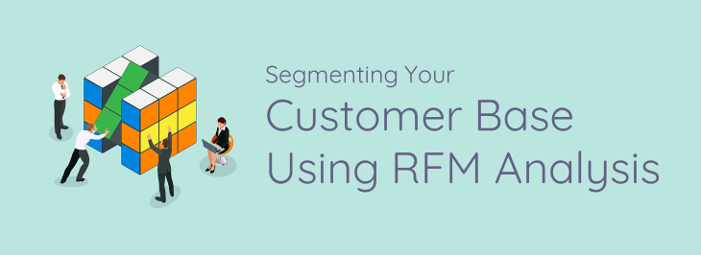

###  Task:

Here we would need to create a model which assigns a customer to a certain customer category based on the total value of orders they’ve placed. This would let us target the most valuable customers with certain offers which promote a higher spend. 

### Data Set Information:

The dataset is a CSV, where each row represents an sku which is a part of an order. The different columns are described below. Every conversation included has at least one request from a consumer and at least one response from a company. Which user IDs are company user IDs can be calculated using the inbound field.

*Attribute Information:*

**InvoiceNo**

A single invoice number represents one order that was placed. There might be multiple rows for the same invoice number, representing the different SKUs that were ordered.

**StockCode**

This represents the sku for the particular item that was ordered.

**Description**

This describes the exact item that was ordered in words.

**Quantity**

The quantity of the specific sku that was ordered.

**InvoiceDate**

This is the date the order was placed.

**UnitPrice**

This is the price of the particular sku that was ordered.

**CustomerID**

An anonymized ID of the customer who placed the order.




### Table of contents:

**1)- Exploring Dataset**

**2)- Data Wrangling**

- Checking the null value

- Duplicated Values handling

- Handeling Canceled and discounted orders

- Handeling features

**3)- Visualization**

**4)- RFM Analysis**

- Monetary

- Frequency

- Recency

- Treating outliers

**5)- Feature Scaling and Dismensionality Reduction**

**6)- Hopkins Test**

**7)- Cluster using K-means clustering**

- Elbow Method

- Silhouette Analysis

- Model building

- Inferences

**8)- Recommendations**

**9)- Prediction of Cluster class** (Additional step)

- Data preperation

- Model building

- Model Evaluation

In [89]:
## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# K-means clustering libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [90]:
## Importing dataset
df=pd.read_csv('C:\\Users\\Hamzah\\Documents\\Busibud Projects\\ml_tasks\\ml_task_1\\data.csv',encoding='unicode_escape')

## Exploring Dataset

In [91]:
## First 5 rows
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [92]:
## Last 5 rows
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID Country  
541904  12/9/2011 12:50       0.85     12680.0  France  
541905  12/9/2011 12:50       2.10     12680.0  France  
541906  12/9/2011 12:50       4.15     12680.0  France  
541907  12/9/2011 12:50       4.15     12680.0  France  
541908  12/9/2011 12:50       4.95     12680.0  France

In [93]:
print('The shape of the Dataset is',df.shape)

The shape of the Dataset is (541909, 8)


In [94]:
## Coulmns details
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [95]:
## Information of datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [96]:
## Statitical Information
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

- It is clearly seems that there are ouliters in Quantity and UnitPrice that have to be removed.
- There are negative values in UnitPrice and Quantity because of cancelled orders.
- Quantity and Unit Price should be multiplied to create Total Price.
- Missing values in Customer ID and Description.
- InvoiceDate should be datetime, not object.

## Data Wrangling

**Checking the null value**

In [97]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

The portion of dataframe where some values are missing is the following:

In [98]:
df_miss=df[df.isnull().any(axis=1)]
df_miss.head(10)

InvoiceNo StockCode                          Description  Quantity  \
622     536414     22139                                  NaN        56   
1443    536544     21773      DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774      DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786                   POLKADOT RAIN HAT          4   
1446    536544     21787                RAIN PONCHO RETROSPOT         2   
1447    536544     21790                   VINTAGE SNAP CARDS         9   
1448    536544     21791   VINTAGE HEADS AND TAILS CARD GAME          2   
1449    536544     21801  CHRISTMAS TREE DECORATION WITH BELL        10   
1450    536544     21802      CHRISTMAS TREE HEART DECORATION         9   
1451    536544     21803       CHRISTMAS TREE STAR DECORATION        11   

          InvoiceDate  UnitPrice  CustomerID         Country  
622   12/1/2010 11:52       0.00         NaN  United Kingdom  
1443  12/1/2010 14:32       2.51         NaN  United Kingdom  
1444  12/1/2010 14:32       2.51         NaN  United Kingdom  
1445  12/1/2010 14:32       0.85         NaN  United Kingdom  
1446  12/1/2010 14:32       1.66         NaN  United Kingdom  
1447  12/1/2010 14:32       1.66         NaN  United Kingdom  
1448  12/1/2010 14:32       2.51         NaN  United Kingdom  
1449  12/1/2010 14:32       0.43         NaN  United Kingdom  
1450  12/1/2010 14:32       0.43         NaN  United Kingdom  
1451  12/1/2010 14:32       0.43         NaN  United Kingdom

We can clearly see that on **12/1/2010** from **11:52**, there are NAN values. So there is an error in data entry for CustomerID as well as description of some items. The approach we would follow would be to drop the rows with empty values 

In [99]:
print(f"Before dropping null values:\nNumber of rows = {df.shape[0]}\nNumber of cols = {df.shape[1]}")
df.dropna(inplace = True)
print(f"\nAfter dropping null values:\nNumber of rows = {df.shape[0]}\nNumber of cols = {df.shape[1]}")

Before dropping null values:
Number of rows = 541909
Number of cols = 8

After dropping null values:
Number of rows = 406829
Number of cols = 8


In [100]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Duplicated Values handling**

In [101]:
print('The number of duplicated orders in the dataset are:',df.duplicated().sum())

The number of duplicated orders in the dataset are: 5225


In [102]:
df[df.duplicated()].head()

InvoiceNo StockCode                        Description  Quantity  \
517    536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527    536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537    536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539    536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555    536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   

         InvoiceDate  UnitPrice  CustomerID         Country  
517  12/1/2010 11:45       1.25     17908.0  United Kingdom  
527  12/1/2010 11:45       2.10     17908.0  United Kingdom  
537  12/1/2010 11:45       2.95     17908.0  United Kingdom  
539  12/1/2010 11:45       4.95     17908.0  United Kingdom  
555  12/1/2010 11:49       2.95     17920.0  United Kingdom

In [103]:
## Dropping the duplicates
df.drop_duplicates(inplace=True)

In [104]:
print('The number of duplicated orders left in the dataset are:',df.duplicated().sum())

The number of duplicated orders left in the dataset are: 0


**Canceled orders**

We want to find the list of cancelled order. Invoice number starting from C are cancelled orders

In [105]:
canceled_orders = df[df['InvoiceNo'].apply(lambda x: x[0]=='C')]
canceled_orders.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

         InvoiceDate  UnitPrice  CustomerID         Country  
141   12/1/2010 9:41      27.50     14527.0  United Kingdom  
154   12/1/2010 9:49       4.65     15311.0  United Kingdom  
235  12/1/2010 10:24       1.65     17548.0  United Kingdom  
236  12/1/2010 10:24       0.29     17548.0  United Kingdom  
237  12/1/2010 10:24       0.29     17548.0  United Kingdom

By analyzing the first 5 values of the dataframe we can see that the quantity has a negative values.

In [106]:
print('The percentage of canceled orders is: {} %'.format(round(canceled_orders.shape[0]/df.shape[0]*100,2)))

The percentage of canceled orders is: 2.21 %


Moreover, it looks like there are some discounts among the canceled orders. They will be analyzed as well.

**Discounts**

In [107]:
discounts = df[df['StockCode'].apply(lambda order: order=='D')]
discounts.head()

InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
141     C536379         D    Discount        -1   12/1/2010 9:41      27.50   
9038    C537164         D    Discount        -1  12/5/2010 13:21      29.29   
14498   C537597         D    Discount        -1  12/7/2010 12:34     281.00   
19392   C537857         D    Discount        -1  12/8/2010 16:00     267.12   
31134   C538897         D    Discount        -1  12/15/2010 9:14       5.76   

       CustomerID         Country  
141       14527.0  United Kingdom  
9038      14527.0  United Kingdom  
14498     15498.0  United Kingdom  
19392     17340.0  United Kingdom  
31134     16422.0  United Kingdom

In [108]:
print('The company issued {} discounts'.format(discounts.shape[0]))

The company issued 77 discounts


In [109]:
## Dropping all the cancelled orders
df = df[df['Quantity'] > 0]

In [110]:
print('Data left after dropping canceled order:',df.shape[0])

Data left after dropping canceled order: 392732


**Customer ID** and **Invoice number**

Convert the CustomerID values to integer (from float) followed by categorical values.
And converting Invoice date feature's datatype

In [111]:
df['CustomerID'] = df['CustomerID'].astype('int64').astype('category')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

**Creating new feature for total amount spent by the customer**

In [112]:
df['Amount'] = df['Quantity'] * df['UnitPrice']

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  category      
 7   Country      392732 non-null  object        
 8   Amount       392732 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


## Visualization

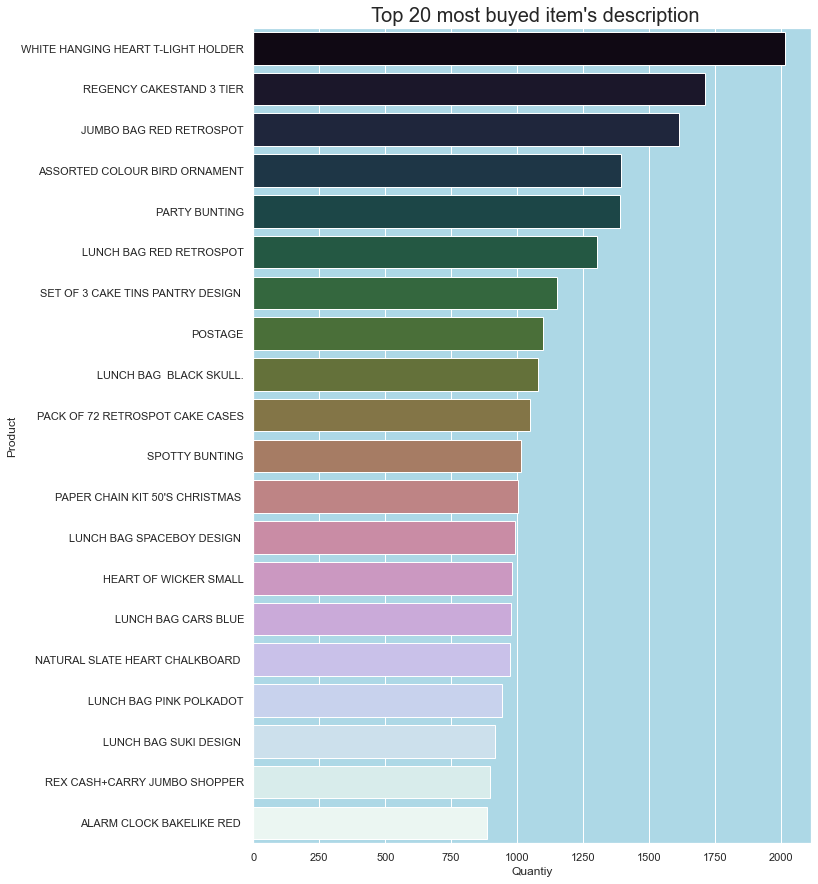

In [114]:
pro = df['Description'].value_counts().head(20).reset_index()
pro
sns.set(rc={'figure.figsize':(10,15)})


ax = plt.axes()
ax.set(facecolor = 'lightblue')
plt.title(" Top 20 most buyed item's description",fontsize = 20)
sns.barplot(y = pro['index'] ,x = pro['Description'],orient = 'h',palette = 'cubehelix')
plt.xlabel('Quantiy')
plt.ylabel('Product')
plt.show()

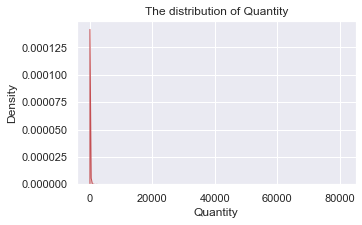

In [115]:
plt.figure(figsize=(5,3))
x_values = df['Quantity']
sns.kdeplot(x_values,color='r',shade=True,label='Quantity')
plt.xlabel('Quantity')
plt.title('The distribution of Quantity')
plt.show()

Text(0.5, 1.0, 'The distribution of Unit Price')

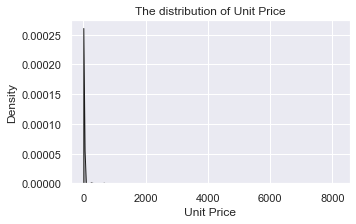

In [116]:
plt.figure(figsize=(5,3))
x_values =df['UnitPrice']
sns.kdeplot(x_values,color='k',shade=True,label='UnitPrice')
plt.xlabel('Unit Price')
plt.title('The distribution of Unit Price')

In [117]:
# Converting Invoice date feature into seperate feature of date time
temp_df = df.copy()
temp_df['Invoice_month']=pd.to_datetime(temp_df['InvoiceDate'], format="%m/%d/%Y %H:%M").dt.month
temp_df['Invoice_date']=pd.to_datetime(temp_df['InvoiceDate'], format="%m/%d/%Y %H:%M").dt.day
temp_df['Invoice_year']=pd.to_datetime(temp_df['InvoiceDate'], format="%m/%d/%Y %H:%M").dt.year
temp_df['Invoice_time_hours']=pd.to_datetime(temp_df['InvoiceDate'], format="%m/%d/%Y %H:%M").dt.hour
temp_df['Invoice_time_minutes']=pd.to_datetime(temp_df['InvoiceDate'], format="%m/%d/%Y %H:%M").dt.minute
temp_df.head(1)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   

          InvoiceDate  UnitPrice CustomerID         Country  Amount  \
0 2010-12-01 08:26:00       2.55      17850  United Kingdom    15.3   

   Invoice_month  Invoice_date  Invoice_year  Invoice_time_hours  \
0             12             1          2010                   8   

   Invoice_time_minutes  
0                    26

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of products buyed')

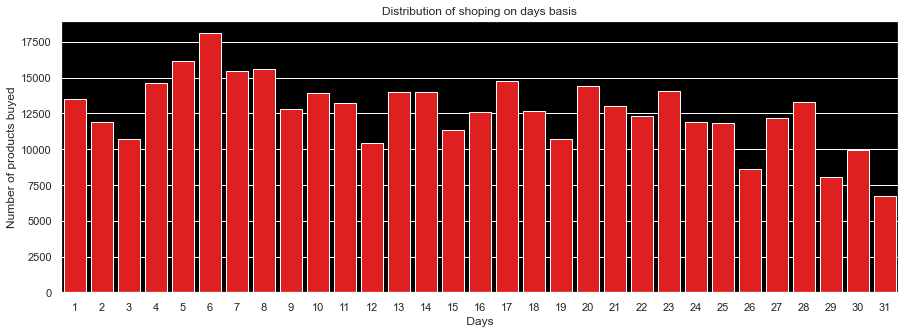

In [118]:
plt.figure(figsize=(15,5))

ax = plt.axes()
ax.set(facecolor = 'black')
travel_date=temp_df['Invoice_date'].value_counts().sort_values(ascending=False).reset_index()
sns.barplot(travel_date['index'],travel_date['Invoice_date'],color='Red',)
plt.title('Distribution of shoping on days basis')
plt.xlabel(' Days ')
plt.ylabel('Number of products buyed')

We can see that most shopping is done from **date 4 to 8** by any customer

([<matplotlib.patches.Wedge at 0x26a7f203dc0>,
 [Text(1.0845291042694223, 0.183838575909859, 'January'),
  Text(0.9687635938877741, 0.5210538351817825, 'February'),
  Text(0.7126067357313101, 0.8379687584811066, 'March'),
  Text(0.33588083751616393, 1.047465542626315, 'April'),
  Text(-0.10296758843763641, 1.095170158345879, 'May'),
  Text(-0.5596089333453682, 0.9470152278184651, 'June'),
  Text(-0.9022092097552781, 0.6293000411828659, 'July'),
  Text(-1.081819145160999, 0.19916660654619142, 'August'),
  Text(-1.0334507071818084, -0.3768018522054004, 'September'),
  Text(-0.5403449452466427, -0.9581374328072163, 'October'),
  Text(0.41031605029105417, -1.0206080241079576, 'November'),
  Text(1.0364553795417821, -0.3684565730434191, 'December')],
 [Text(0.591561329601503, 0.10027558685992309, '5.3%'),
  Text(0.5284165057569676, 0.28421118282642677, '5.0%'),
  Text(0.38869458312616906, 0.4570738682624217, '6.8%'),
  Text(0.1832077295542712, 0.5713448414325354, '5.7%'),
  Text(-0.05616413

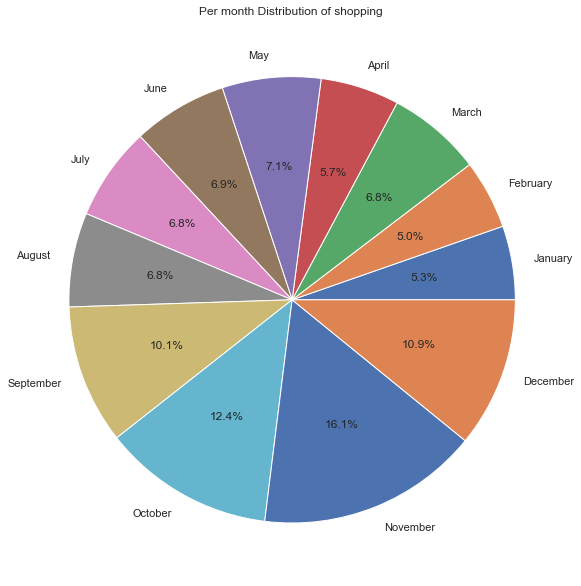

In [119]:
# Plotting the shopping distribution per month
plt.title('Per month Distribution of shopping ')
labels = 'January','February','March', 'April', 'May', 'June','July','August','September','October','November','December'
sizes=temp_df.groupby('Invoice_month').size()
plt.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=False)

November month has the highest sale where as Febraury has the lowest

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of products buyed')

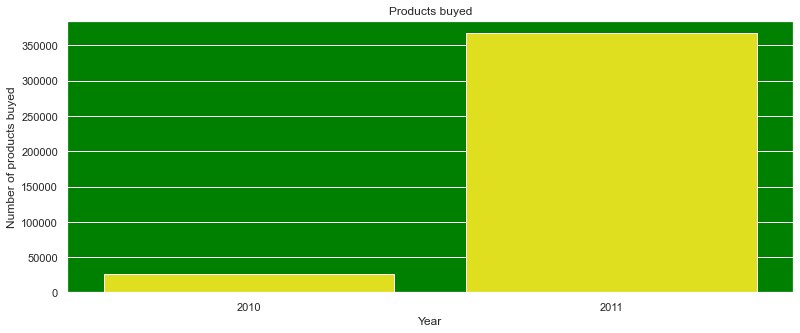

In [120]:
plt.figure(figsize=(13,5))

ax = plt.axes()
ax.set(facecolor = 'green')
a=temp_df['Invoice_year'].value_counts().sort_values(ascending=False).reset_index()
sns.barplot(a['index'],a['Invoice_year'],color='Yellow',)
plt.title('Products buyed')
plt.xlabel('Year')
plt.ylabel('Number of products buyed')

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of hour when shooping was done')

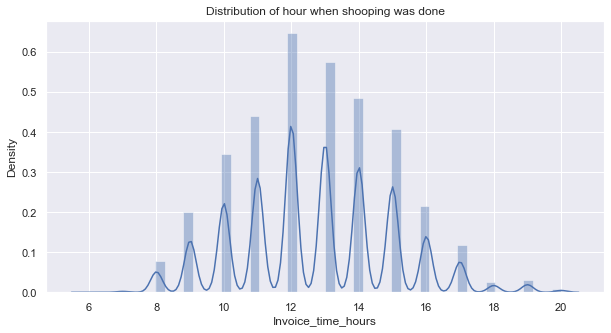

In [121]:
## The distribution of the duration of flight
plt.figure(figsize=(10,5))
sns.distplot(temp_df['Invoice_time_hours'])
plt.title('Distribution of hour when shooping was done')

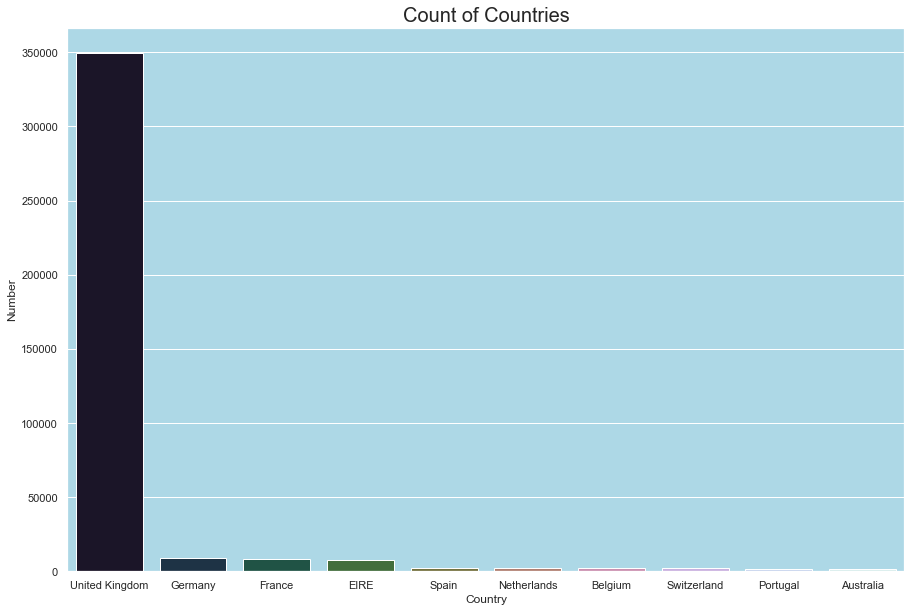

In [122]:
pro = temp_df['Country'].value_counts().head(10).reset_index()
pro
sns.set(rc={'figure.figsize':(15,10)})


ax = plt.axes()
ax.set(facecolor = 'lightblue')
plt.title("Count of Countries",fontsize = 20)
sns.barplot(x = pro['index'] ,y = pro['Country'],orient = 'v',palette = 'cubehelix')
plt.xlabel('Country')
plt.ylabel('Number')
plt.show()

Our Data is all set and we have visualized the features

## RFM Analysis

Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors:

**Recency**: How recently a customer has made a purchase

**Frequency**: How often a customer makes a purchase

**Monetary Value**: How much money a customer spends on purchases

RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The *best* customer would receive a top score in every category.

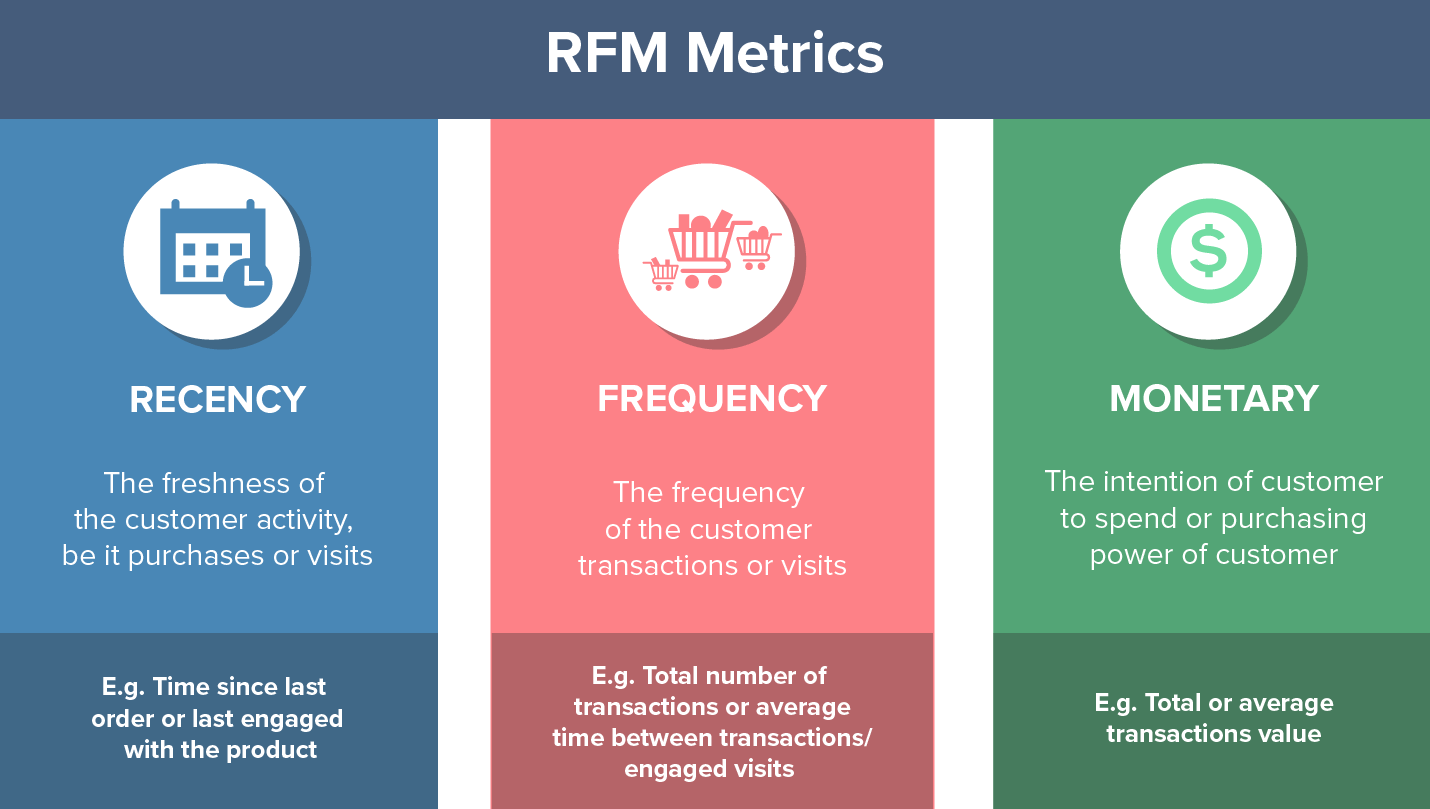

**Monetary** - 

Total or average amount spent by the customer.



In [123]:
# Calculating Monetary attribute
cus_data = df.groupby('CustomerID')[['Amount']].sum() # Total amount spent
cus_data.rename(columns={'Amount':'Monetary'},inplace=True)
cus_data.head()

Monetary
CustomerID          
12346       77183.60
12347        4310.00
12348        1797.24
12349        1757.55
12350         334.40

<AxesSubplot:title={'center':'Distribution of Monetary'}, xlabel='Monetary Metric', ylabel='Count'>

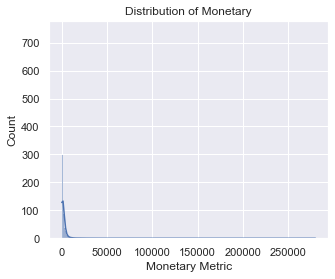

In [124]:
plt.figure(figsize=(5,4))
plt.xlabel('Monetary Metric')
plt.title('Distribution of Monetary')
sns.histplot(data=cus_data, x='Monetary', kde=True)

**Frequency** -

Total number of transactions made by customer or average time between transactions.

In [125]:
# Calculating frequency attribute
cus_data['Frequency'] = df.groupby('CustomerID')['InvoiceNo'].count()
cus_data.head()

Monetary  Frequency
CustomerID                     
12346       77183.60          1
12347        4310.00        182
12348        1797.24         31
12349        1757.55         73
12350         334.40         17

<AxesSubplot:title={'center':'Distribution of Frequency'}, xlabel='Frequency Metric', ylabel='Count'>

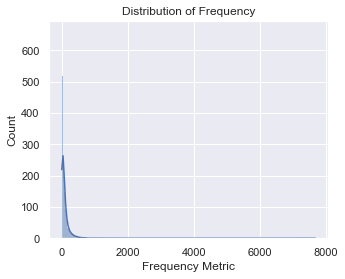

In [126]:
plt.figure(figsize=(5,4))
plt.xlabel('Frequency Metric')
plt.title('Distribution of Frequency')
sns.histplot(data=cus_data, x='Frequency', kde=True)


**Recency** -

Time since last order or engaged with product.

In [127]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [128]:
df['diff'] = max_date - df['InvoiceDate']
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  Amount  \
0 2010-12-01 08:26:00       2.55      17850  United Kingdom   15.30   
1 2010-12-01 08:26:00       3.39      17850  United Kingdom   20.34   
2 2010-12-01 08:26:00       2.75      17850  United Kingdom   22.00   
3 2010-12-01 08:26:00       3.39      17850  United Kingdom   20.34   
4 2010-12-01 08:26:00       3.39      17850  United Kingdom   20.34   

               diff  
0 373 days 04:24:00  
1 373 days 04:24:00  
2 373 days 04:24:00  
3 373 days 04:24:00  
4 373 days 04:24:00

In [129]:
import datetime as dt

cus_data['Recency'] = df.groupby('CustomerID')['diff'].min().dt.days
cus_data = cus_data.reset_index()
cus_data.head()

CustomerID  Monetary  Frequency  Recency
0      12346  77183.60          1      325
1      12347   4310.00        182        1
2      12348   1797.24         31       74
3      12349   1757.55         73       18
4      12350    334.40         17      309

<AxesSubplot:title={'center':'Distribution of Recency'}, xlabel='Recency Metric', ylabel='Count'>

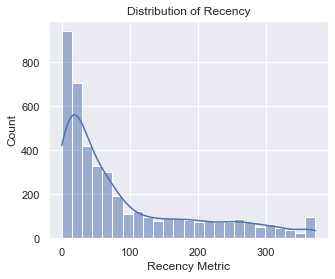

In [130]:
plt.figure(figsize=(5,4))
plt.xlabel('Recency Metric')
plt.title('Distribution of Recency')
sns.histplot(data=cus_data, x='Recency', kde=True)

<AxesSubplot:>

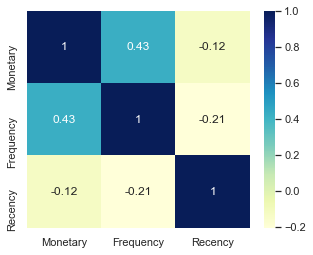

In [131]:
plt.figure(figsize=(5,4))
sns.heatmap(cus_data.corr(),cmap="YlGnBu",annot=True)

<Figure size 720x720 with 0 Axes>

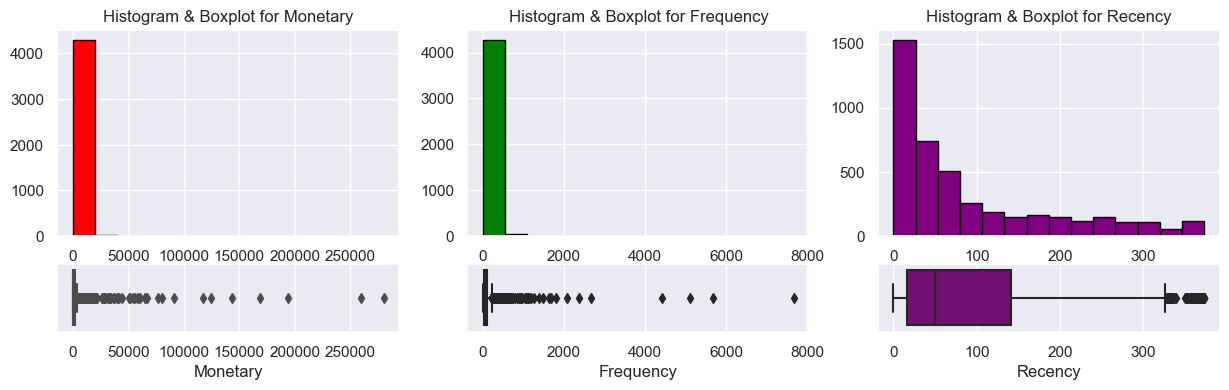

In [132]:
plt.figure(figsize=(10,10))
fig, axis = plt.subplots(nrows = 2, ncols = 3, 
                         figsize = (15, 4), dpi = 100,
                         sharex = False, sharey = False,
                         gridspec_kw = {'height_ratios': [3, 1]}
                         )

# Monetary
axis[0, 0].hist(cus_data['Monetary'], bins = 'sturges', facecolor = 'red', edgecolor = 'black')
sns.boxplot(x = 'Monetary', data = cus_data,  color = 'red', ax = axis[1, 0])
axis[0, 0].set_title("Histogram & Boxplot for Monetary")

# Frequency
axis[0, 1].hist(cus_data['Frequency'], bins = 'sturges', facecolor = 'green', edgecolor = 'black')
sns.boxplot(x = 'Frequency', data = cus_data,  color = 'green', ax = axis[1, 1])
axis[0, 1].set_title("Histogram & Boxplot for Frequency")

# Recency
axis[0, 2].hist(cus_data['Recency'], bins = 'sturges', facecolor = 'purple', edgecolor = 'black')
sns.boxplot(x = 'Recency', data = cus_data,  color = 'purple', ax = axis[1, 2])
axis[0, 2].set_title("Histogram & Boxplot for Recency")

plt.show()

Based on the above box plots, it's visible that Monetary and Frequency attributes have outliers.



**Treating Outliers**

Outliers in Monetary and Frequency column are treated with the **inter-quartile range (IQR) metric**.

In [133]:
def treating_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr= q3 - q1
    df_new= df[(df[col] >= q1 - 1.5 * iqr) & (df[col] <= q3 + 1.5 * iqr)]
    return df_new

In [134]:
cus_data = treating_outliers(cus_data, 'Monetary')
cus_data = cus_data.reset_index(drop = True)

In [135]:
cus_data = treating_outliers(cus_data, 'Frequency')
cus_data = cus_data.reset_index(drop = True)

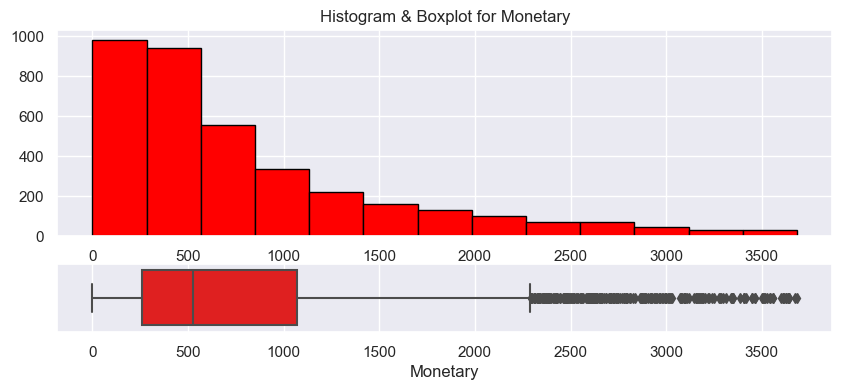

In [136]:
fig, axis_mon = plt.subplots(nrows = 2, ncols = 1, 
                         figsize = (10, 4), dpi = 100,
                         sharex = False, sharey = False,
                         gridspec_kw = {'height_ratios': [3, 1]}
                         )

# Monetary
axis_mon[0].hist(cus_data['Monetary'], bins = 'sturges', facecolor = 'red', edgecolor = 'black')
sns.boxplot(x = 'Monetary', data = cus_data,  color = 'red', ax = axis_mon[1])
axis_mon[0].set_title("Histogram & Boxplot for Monetary")

plt.show()

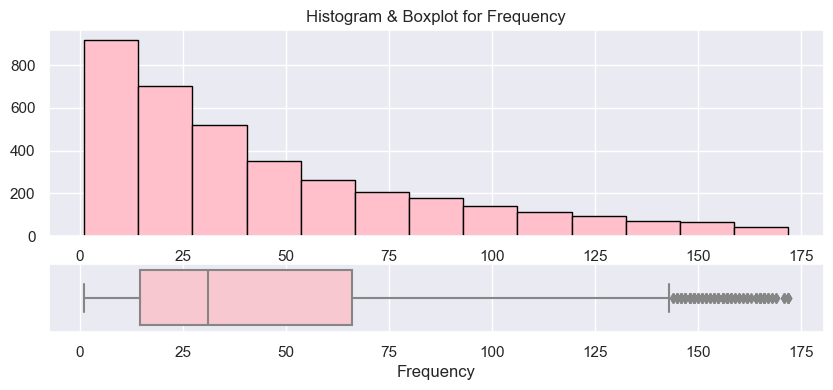

In [137]:
fig, axis_mon = plt.subplots(nrows = 2, ncols = 1, 
                         figsize = (10, 4), dpi = 100,
                         sharex = False, sharey = False,
                         gridspec_kw = {'height_ratios': [3, 1]}
                         )

# Monetary
axis_mon[0].hist(cus_data['Frequency'], bins = 'sturges', facecolor = 'pink', edgecolor = 'black')
sns.boxplot(x = 'Frequency', data = cus_data,  color = 'pink', ax = axis_mon[1])
axis_mon[0].set_title("Histogram & Boxplot for Frequency")

plt.show()

In [138]:
cus_data.describe().loc[['mean', 'std'], :]

Monetary  Frequency     Recency
mean  796.472625  45.584767  103.678406
std   750.042368  40.243183  102.839319

## Feature Scaling and Dismensionality Reduction

Scaling the RFM features using the standard scaling technique and reducing the dimension to converge to global centroids faster using the KMeans clustering algorithm.

In [139]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

preprocessor = Pipeline(
        [
            ("scaler", MinMaxScaler()),
            ("pca", PCA(n_components=2, random_state=42)),
        ]
    )

In [140]:
X = cus_data.drop('CustomerID',axis=1)
X_scaled = pd.DataFrame(preprocessor.fit_transform(X),columns=['PC_1','PC_2'])

In [141]:
X_scaled.head()

PC_1      PC_2
0  0.130626  0.011533
1  0.368026  0.024743
2 -0.525207  0.266060
3  0.471965  0.181230
4 -0.408376 -0.011989

<AxesSubplot:xlabel='PC_2', ylabel='Count'>

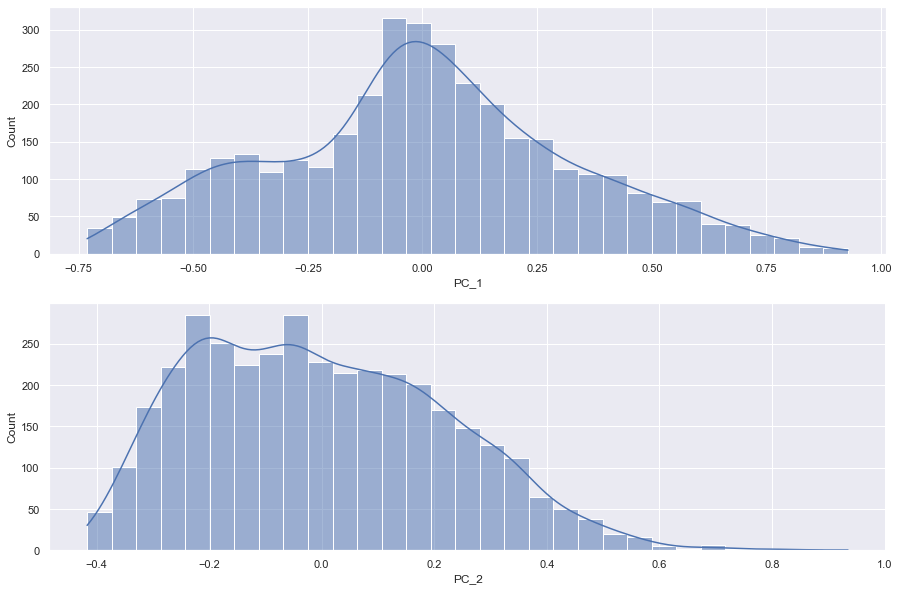

In [142]:
plt.subplot(211)
sns.histplot(data=X_scaled, x='PC_1', kde=True)

plt.subplot(212)
sns.histplot(data=X_scaled, x='PC_2', kde=True)

## Hopkins Test

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

If the value is between **{0.01, ...,0.3}**, the data is **regularly spaced**.

If the value is around **0.5**, it is **random**.

If the value is between **{0.7, ..., 0.99}**, it has a **high tendency** to cluster.


In [143]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [144]:
for i in range(5):
    print('Hopkins statistic value is:',round(hopkins(X_scaled),3))

Hopkins statistic value is: 0.944
Hopkins statistic value is: 0.943
Hopkins statistic value is: 0.947
Hopkins statistic value is: 0.941
Hopkins statistic value is: 0.946


Since the Hopkins test value hovers around **0.95**, therefore given data have **high clustering tendency**.

## Cluster using K-means clustering

**What is clustering ?**

Clustering is the process of grouping observations of similar kinds into smaller groups within the larger population. It has widespread application in business analytics. One of the questions facing businesses is how to organize the huge amounts of available data into meaningful structures.Or break a large heterogeneous population into smaller homogeneous groups. Cluster analysis is an exploratory data analysis tool which aims at sorting different objects into groups in a way that the degree of association between two objects is maximal if they belong to the same group and minimal otherwise.

**When to use clustering?**

Clustering is primarily used to perform segmentation, be it customer, product or store. We have already talked about customer segmentation using cluster analysis in the example above. Similarly products can be clustered together into hierarchical groups based on their attributes like use, size, brand, flavor etc; stores with similar characteristics – similar sales, size, customer base etc, can be clustered together.

**What is K-Means Algorithm?**

It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.

K defines the number of pre-defined clusters that need to be created in the process, following are the methods to find the optimal value of K (Clusters)¶

- *Elbow Method*

- *Silhouette Analysis*

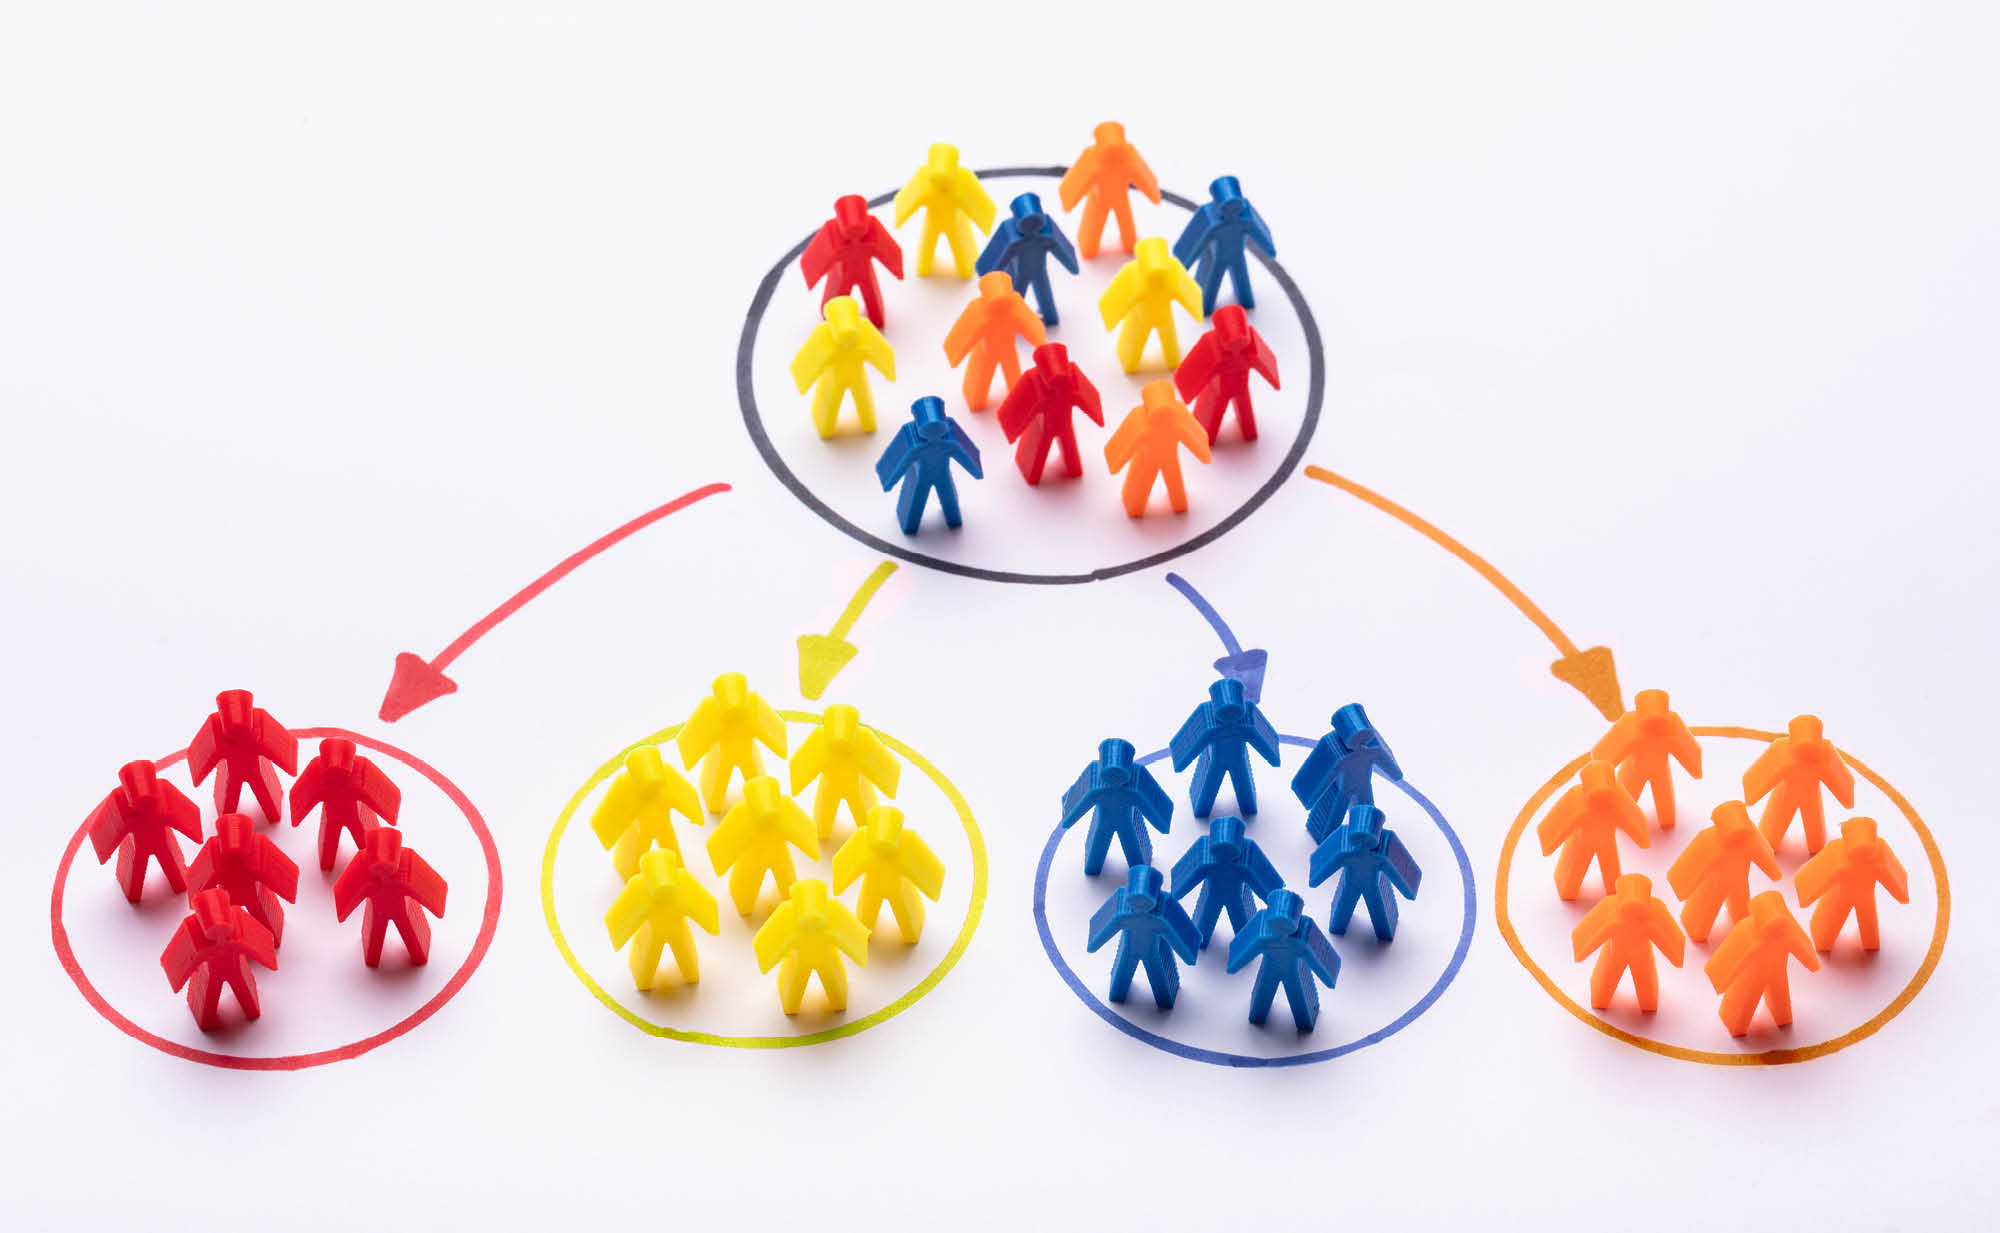


#### Elbow Method

Elbow Method is an empirical method to find the optimal number of clusters for a dataset. In this method, we pick a range of candidate values of k, then apply K-Means clustering using each of the values of k. Find the average distance of each point in a cluster to its centroid, and represent it in a plot. Pick the value of k, where the **average distance falls suddenly**.

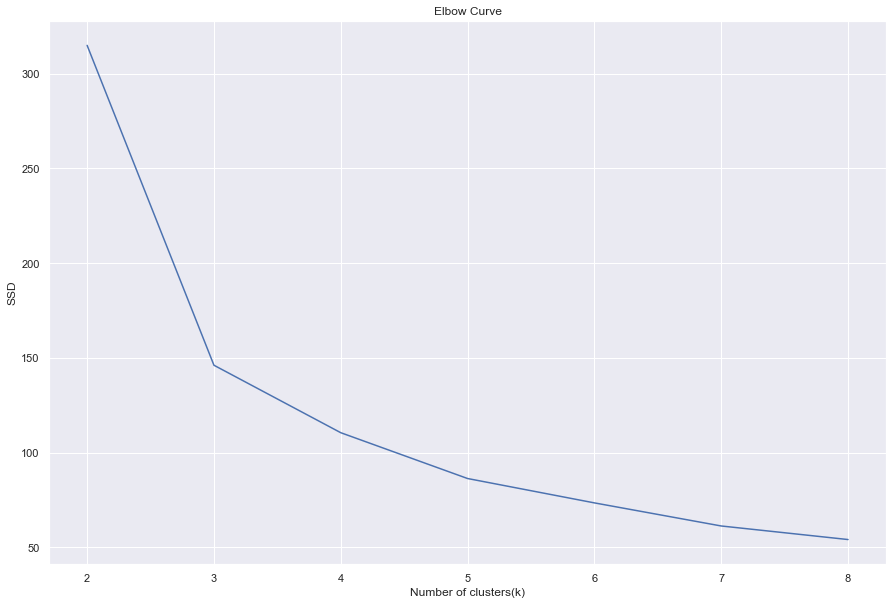

In [145]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

plt.plot(range_n_clusters,ssd)
plt.xlabel('Number of clusters(k)')
plt.ylabel('SSD')
plt.title('Elbow Curve')
plt.show()

Based on above "elbow" curve, **k=3** seems to be the **optimal number** of clusters.

#### Silhouette Analysis

The silhouette Method is also a method to find the optimal number of clusters and interpretation and validation of consistency within clusters of data. The silhouette method computes silhouette coefficients of each point that measure how much a point is similar to its own cluster compared to other clusters. by providing a **succinct graphical representation** of how well each object has been classified.

silhouette score = p − qmax ( p, q )

**p** is the **mean distance** to the points in the **nearest cluster** that the data point is not a part of.

**q** is the **mean intra-cluster distance** to all the points in its **own cluster**.

The value of the silhouette score range lies between **-1 to 1**.

A score closer to **1** indicates that the data point is **very similar** to other data points in the cluster,

A score closer to **-1** indicates that the data point is **not similar** to the data points in its cluster.

In [146]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, round(silhouette_avg,2)))

For n_clusters=2, the silhouette score is 0.46
For n_clusters=3, the silhouette score is 0.51
For n_clusters=4, the silhouette score is 0.45
For n_clusters=5, the silhouette score is 0.43
For n_clusters=6, the silhouette score is 0.4
For n_clusters=7, the silhouette score is 0.41
For n_clusters=8, the silhouette score is 0.4


Using silhouette analysis **k=3** seems to be the **optimal number** of clusters.

#### Model Building

In [147]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50,random_state=1)
kmeans.fit(X_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=1)

In [148]:
# Adding cluster labels to master dataframe
X_scaled['cluster_id'] = kmeans.labels_
X['cluster_id'] = kmeans.labels_

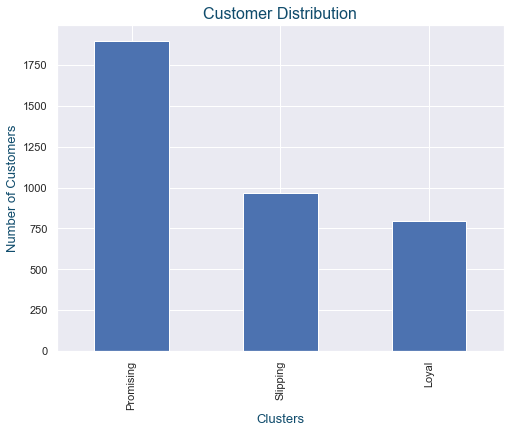

In [149]:
font_title = {
        'color':  '#104C6C',
        'weight': 'normal',
        'size': 16,
        }


font_label = {
        'color':  '#104C6C',
        'weight': 'normal',
        'size': 13,
        }
plt.figure(figsize=(8,6))
ax = X_scaled['cluster_id'].value_counts().plot(kind='bar')
ax.set_xticklabels(['Promising','Slipping','Loyal'])
ax.set_ylabel('Number of Customers',font_label)
ax.set_xlabel('Clusters',font_label)
ax.set_title("Customer Distribution",font_title)
plt.show()

**Clustering profiling using R-F-M**

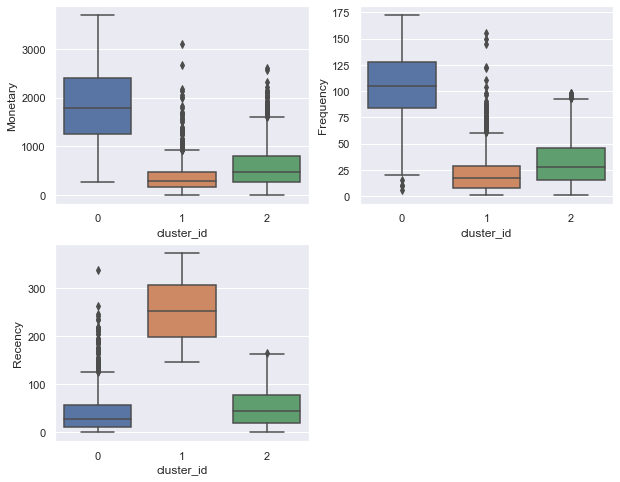

In [150]:
# Visualizing Numerical columns using Boxplots

cols = X.columns[0:-1].tolist()
r = c = 0
fig,ax = plt.subplots(2,2,figsize=(10,8))

for n,i in enumerate(cols):
    sns.boxplot(x='cluster_id',y=cols[n], data=X,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

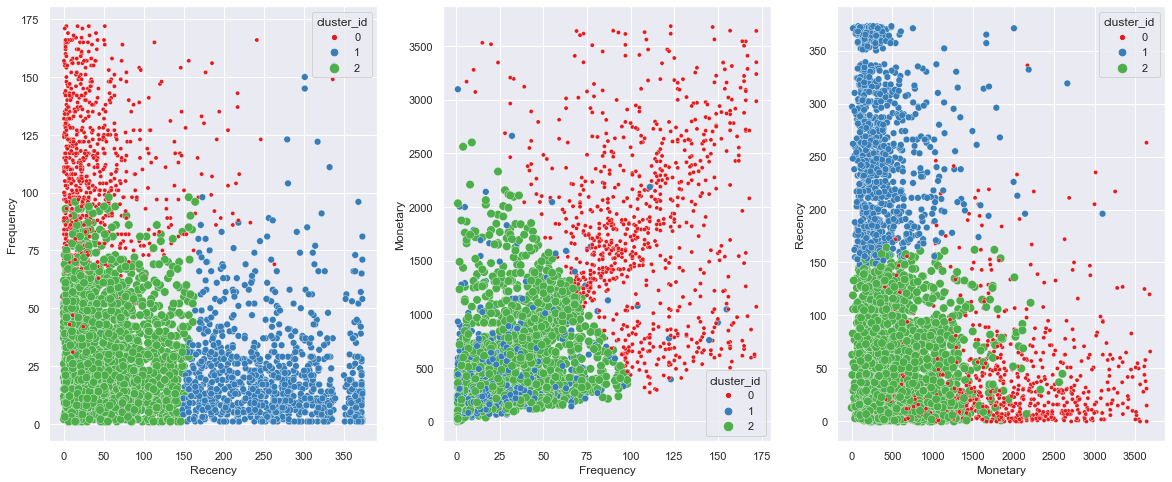

In [151]:
fig = plt.figure(figsize=[20,8])

plt.subplot(1,3,1)
sns.scatterplot(data=X,x="Recency",y="Frequency",hue="cluster_id",size="cluster_id",palette="Set1")
plt.subplot(1,3,2)
sns.scatterplot(data=X,x="Frequency",y="Monetary",hue="cluster_id",size="cluster_id",palette="Set1")
plt.subplot(1,3,3)
sns.scatterplot(data=X,x="Monetary",y="Recency",hue="cluster_id",size="cluster_id",palette="Set1")
plt.show()

In [152]:
X.head()

Monetary  Frequency  Recency  cluster_id
0   1797.24         31       74           2
1   1757.55         73       18           0
2    334.40         17      309           1
3   2506.04         85       35           0
4     89.00          4      203           1

In [153]:
import plotly.express as px

plotly_fig = px.scatter_3d(X, x = 'Monetary', y = 'Frequency', z = 'Recency', color = 'cluster_id')
plotly_fig.show()

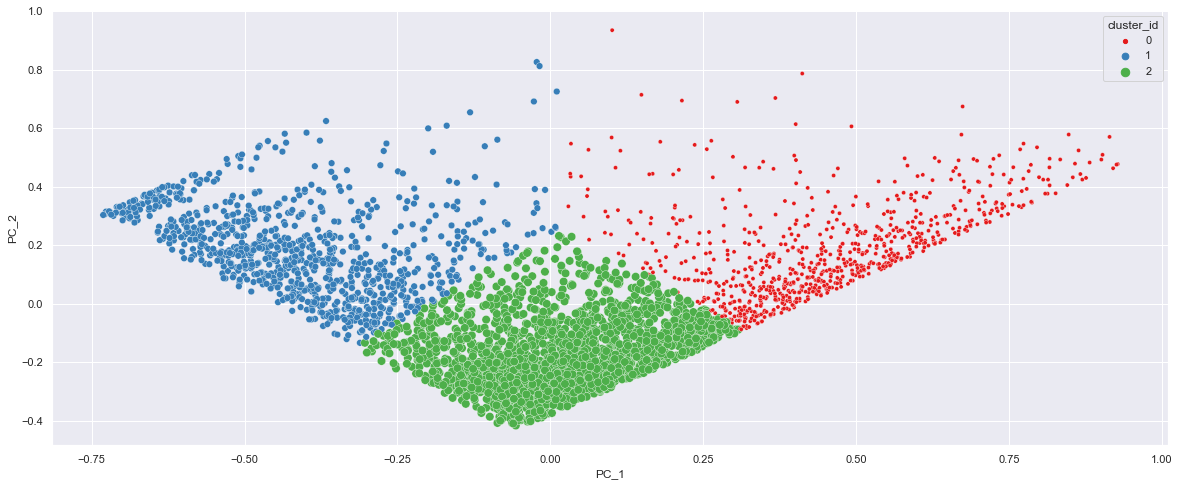

In [154]:
# Vusializing clusters using Principle Components
fig = plt.figure(figsize=[20,8])

sns.scatterplot(data=X_scaled,x="PC_1",y="PC_2",hue="cluster_id",size="cluster_id",palette="Set1")
plt.show()

#### **Inference:**

**Cluster 0** contains the customers who generate the least revenue and are not frequent, most likely because these were one-time customers. Hence they can be labeled as **Slipping**.

**Cluster 1** seems to have the **most loyal customers**, as they bring the **most revenue** and are often the most **frequent customers**.

**Cluster 2** customers seem promising as it consists of **frequent buyers**, however **revenue generation is not as high as Loyal customers**.

####  Cluster Labels:

**Cluster 0 - Slipping**

**Cluster 1 - Loyal**

**Cluster 2 - Promising**

## Recommendations

After segmenting customers into loyal, slipping, and promising it empowers businesses to run personalized, high-performing campaigns and preserves profit margin. Below are a few recommendations or targeted strategies for each customer segment:

**Loyal** - Loyalty programs are effective for these repeat visitors. Advocacy programs and reviews are also common X1X strategies. Lastly, consider rewarding these customers with Free Shipping or other like benefits.

**Promising** - Focus on increasing monetization through product recommendations based on past purchases and incentives tied to spending thresholds.

**Slipping** - Customers leave for a variety of reasons. Depending on your situation price deals, new product launches, or other retention strategies.

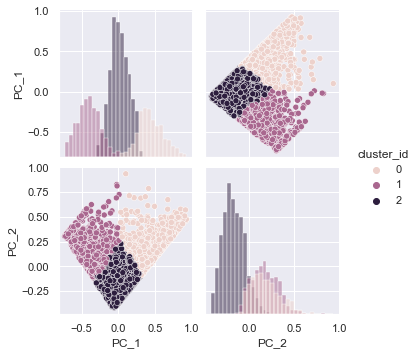

In [156]:
sns.pairplot(X_scaled,diag_kind='hist',hue='cluster_id')

## Prediction of Cluster Class

This is an additonal step. Here with our Scaled and Dimensionality reduced data we will classifify each entry with refrence to the clusters we have formed.

In [177]:
## Our dataset
X_scaled.head()

PC_1      PC_2  cluster_id
0  0.130626  0.011533           2
1  0.368026  0.024743           0
2 -0.525207  0.266060           1
3  0.471965  0.181230           0
4 -0.408376 -0.011989           1

In [178]:
## Dividing dependent and independent variable
X_class = X_scaled[['PC_1','PC_2']]
y_class = X_scaled['cluster_id']

In [179]:
## Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

In [164]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

**Model Building**

In [165]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

In [180]:
## Best model
find_best_model(X_train,y_train)

model                         best_parameters     score
0  logistic_regression                               {'C': 10}  0.991423
1        decision_tree  {'criterion': 'gini', 'max_depth': 10}  0.984016
2        random_forest                    {'n_estimators': 50}  0.989864
3                  svm           {'C': 20, 'kernel': 'linear'}  0.991423

We can see each algorthim have achived a great score. We will use logictic regression to build our model

In [182]:
# Creating Logistic regression Model
classifier = LogisticRegression(solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression()

**Evaluation**

In [183]:
## Using k fold cross validation in order to know the score

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv2 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

print(cross_val_score( classifier,X_class,y_class,cv=cv2))

[0.9781719  0.98499318 0.98226467 0.97407913 0.97953615]


In [172]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

array([[226,   0,  15],
       [  0, 300,   2],
       [  0,   2, 554]], dtype=int64)

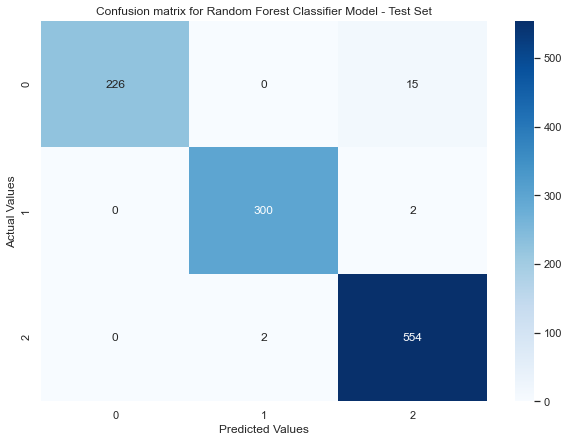

In [173]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [174]:
## Accuracy Score
score=accuracy_score(y_test,y_pred)
print('The accuracy is {}%'.format(round(score,3)*100))

The accuracy is 98.3%


In [175]:
## Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       241
           1       0.99      0.99      0.99       302
           2       0.97      1.00      0.98       556

    accuracy                           0.98      1099
   macro avg       0.99      0.98      0.98      1099
weighted avg       0.98      0.98      0.98      1099

